In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from rosely import WindRose
import plotly.express as px
import plotly.io as pio

In [2]:
data = pd.read_csv('../data/revised_weather.csv')

In [3]:
# This isn't used as Rosely converts degrees to Cardinal points, but in case it's needed later... 

def cardinal_direction(wind_deg):
    if wind_deg <= 11.25 or wind_deg > 348.75:
        return 'N'
    elif 11.25 < wind_deg <= 33.75:
        return 'NNE'
    elif 33.75 < wind_deg <= 56.25:
        return 'NE'
    elif 56.25 < wind_deg <= 78.75:
        return 'ENE'
    elif 78.75 < wind_deg <= 101.25:
        return 'E'
    elif 101.25 < wind_deg <= 123.75:
        return 'ESE'
    elif 123.75 < wind_deg <= 146.25:
        return 'SE'
    elif 146.25 < wind_deg <= 168.75:
        return 'SSE'
    elif 168.75 < wind_deg <= 191.25:
        return 'S'
    elif 191.25 < wind_deg <= 213.75:
        return 'SSW'
    elif 213.75 < wind_deg <= 236.25:
        return 'SW'
    elif 236.25 < wind_deg <= 258.75:
        return 'WSW'
    elif 258.75 < wind_deg <= 281.25:
        return 'W'
    elif 281.75 < wind_deg <= 303.75:
        return 'WNW'
    elif 303.75 < wind_deg <= 326.25:
        return 'NW'
    elif 326.25 < wind_deg <= 348.75:
        return 'NNW'
    else:
        return 'Not Found'



In [9]:
wind = pd.DataFrame()
wind.index = data.index
wind['ws'] = data['wind_speed']
wind['wd'] = data['wind_deg']
wind['dt'] = data['dt']

In [14]:
WR.plot(output_type='show',
        out_file = '../images/all_wr_aggrnyl.html',
        template='xgridoff', 
        colors='Aggrnyl', 
        colors_reversed=True,
        title='Killbuck OH wind trends')


In [4]:
winter = data[data['month'].isin([1,2,3])]
winter['ws'] = winter['wind_speed']
winter['wd'] = winter['wind_deg']

spring = data[data['month'].isin([4,5,6])]
spring['ws'] = spring['wind_speed']
spring['wd'] = spring['wind_deg']

summer = data[data['month'].isin([7,8,9])]
summer['ws'] = summer['wind_speed']
summer['wd'] = summer['wind_deg']

fall = data[data['month'].isin([10,11,12])]
fall['ws'] = fall['wind_speed']
fall['wd'] = fall['wind_deg']

/tmp/ipykernel_801/539889531.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_801/539889531.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_801/539889531.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_801/539889

In [30]:
WRSP = WindRose(spring)
WRSP.calc_stats(normed=False, bins=7)
# WRSP.wind_df.rename(columns={'speed': 'Speed (m/s)'}, inplace=True)
plot = WRSP.plot(output_type='show',
        out_file = '../images/spring_wr_aggrnyl.html',
        template='seaborn', 
        colors='Aggrnyl', 
        colors_reversed=True,
        title='Spring Wind')




In [6]:
WRSU = WindRose(summer)
WRSU.calc_stats(normed=False, bins=6)
WRSU.plot(output_type='show',
        out_file = '../images/summer_wr_aggrnyl.html',
        template='xgridoff', 
        colors='Aggrnyl', 
        colors_reversed=True,
        title='Summer Wind')


In [7]:
pio.templates.keys()

dict_keys(['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark', 'presentation', 'xgridoff', 'ygridoff', 'gridon', 'none'])

In [10]:
WRFA = WindRose(fall)
WRFA.calc_stats(normed=False, bins=6)
WRFA.plot(output_type='show',
        out_file = '../images/fall_wr_aggrnyl.html',
        template='xgridoff', 
        colors='Aggrnyl', 
        colors_reversed=True,
        title='Fall Wind')


In [11]:
WRWI = WindRose(winter)
WRWI.calc_stats(normed=False, bins=6)
WRWI.plot(output_type='show',
        out_file = '../images/winter_wr_aggrnyl.html',
        template='xgridoff', 
        colors='Aggrnyl', 
        colors_reversed=True,
        title='Winter Wind')


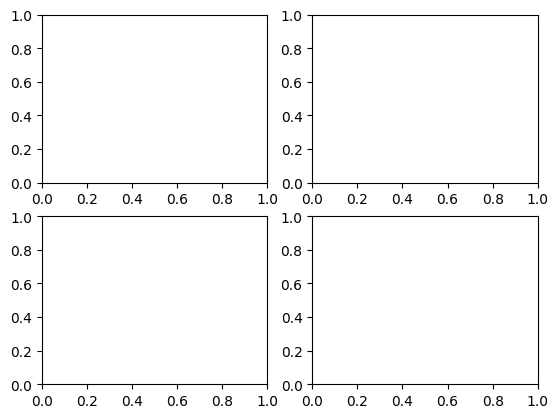

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

In [32]:
fig = px.bar_polar(
    WRWI.wind_df, r="frequency", theta="direction", color="speed",
    template='seaborn', color_discrete_sequence=px.colors.sequential.Aggrnyl[::-1], 
    category_orders={'direction': [
        'N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 
        'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    },
    title='Winter',

    )

fig.update_layout(showlegend=False, 
    legend=dict(
    orientation="v",
    yanchor="bottom",
    y=.4,
    xanchor="right",
    x=1
))

pio.write_image(fig, file='../images/wind_rose_images/winter.png', height=500, width=500, scale=5.0)
